# CS422 Final Project by Cassie Carlson

In [ ]:
!pip install skl2onnx
!pip install onnxruntime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 292.3/292.3 kB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.6/14.6 MB 31.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.8/83.8 kB 10.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.9/5.9 MB 44.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 10.1 MB/s eta 0:00:00


In [ ]:
!pip install sklearn2pmml

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 48.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 14.9 MB/s eta 0:00:00
  Created wheel for sklearn2pmml: filename=sklearn2pmml-0.97.0-py3-none-any.whl size=7016075 sha256=14b964c2fe619b2b216e3448ca6fc8c34a7c62d1b60e072cbd169988e17a5ff8
  Stored in directory: /root/.cache/pip/wheels/b5/94/91/aa0e25b14cb527ce1fcca7ce1af61ba7adc4621869e3974633
Successfully built sklearn2pmml


In [ ]:
import os

import numpy as np
import pandas as pd

import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import model_selection
from sklearn.decomposition import PCA

from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

from sklearn.neighbors import KNeighborsClassifier

from sklearn.pipeline import Pipeline

from skl2onnx.common.data_types import FloatTensorType
from skl2onnx import convert_sklearn
from skl2onnx.convert import to_onnx

from sklearn2pmml.pipeline import PMMLPipeline
from sklearn2pmml import sklearn2pmml

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/data_public.csv')
df.head()

,A,B,C,D,E,F,G,H,I,J,K,L,M,N,O,Class
0,231.420023,-12.210984,217.624839,-15.611916,140.047185,76.904999,131.591871,198.160805,82.873279,127.350084,224.592926,-5.992983,-14.689648,143.072058,153.439659,2
1,-38.019270,-14.195695,9.583547,22.293822,-25.578283,-18.373955,-0.094457,-33.711852,-8.356041,23.792402,4.199023,2.809159,-59.330681,-11.685950,1.317104,3
2,-39.197085,-20.418850,21.023083,19.790280,-25.902587,-19.189004,-2.953836,-25.299219,-6.612401,26.285392,5.911292,6.191587,-56.924996,-4.675187,-1.027830,2
3,221.630408,-5.785352,216.725322,-9.900781,126.795177,85.122288,108.857593,197.640135,82.560019,157.105143,212.989231,-3.621070,-15.469156,135.265859,149.212489,2
4,228.558412,-12.447710,204.637218,-13.277704,138.930529,91.101870,115.598954,209.300011,89.961688,130.299732,201.795100,-1.573922,-15.128603,148.368622,147.492663,3


In [ ]:
df.shape

(1200000, 16)

# Abstract

In this data mining final project, I aimed to analyze a blind dataset and brainstorm techniques that could best be utilized to classify the data based on the observations I made. Throughout this process, I discovered that there were three different classes that showed no discernible differences amongst each other over all given attributes. I also found that class 2 was the easiest to identify, with classes 1 and 3 proving to be a much larger challenge. In the end, I learned a lot about how a data scientist's code needs to change based on the size of the dataset they are given in order to maintain a workable runtime. Additionally I learned how to problem solve a different solution to a complex problem that doesn't seem to have an intuitive answer even after exploratory analysis. If this project were to be continued in the future, I believe there is room to continue to split up features to visualize how the data sits together in little pockets of feature space that could be used to build a better model. Additionally, if the domain of the data and the attributes was given, there could be a better intuitive understanding of how features work together to produce a class label.

# Overview

### Problem Statement:

The goal of this project was to train and utilize a data mining model on a raw dataset with a large number of entries while not knowing anything about the domain from where the data was obtained.

To start this project, I searched for relevant articles that talked about the data mining process and the steps involved to completing a project. From these, I developed a flow of steps that I would take to process the data given and complete this final project. The process that I took for this went through data cleaning, exploratory data analysis, feature engineering, model building and training, and model validation.

# Data Processing

Data processing is the procedure of analyzing and modifying a raw dataset to clean it and prepare it for whatever manipulations and model training it will be used for later in the data mining process. There are five main types of data to look out for when cleaning a dataset and several different techniques that can be utilized depending on the application[1].

1.   **Missing Data**

  Missing data refers to any null, N/A, or empty values in a dataset. Samples with missing values can either be removed from the dataset or filled with a best guess as to what the value should be.

2.   **Duplicate Data**

  Duplicate data is any entries that are identical to each other across one or all features. Duplicates over just one feature may not need to be removed, but it depends on the domain of the particular feature and what it represents about the sample.

3.   **Outliers**

  Outliers are points that deviate significantly from the rest of the dataset and may also behave differently. Outliers can be dealt with by either treating them as a special case for classification or by removing them to avoid skewing any descriptive statistics used for analysis.

4.   **Invalid Data**

  Invalid data is used to describe any values that are illogical for the domain of the feature they're contained in. For example, having a negative value for a time feature doesn't make sense and should be corrected.

5.  **Data Type Issues**

  The type of data contained in a dataset is important to know because it can change the way the data is handled later. Specifically with string or DateTime datatypes, certain measures should be taken to standardize values to make processing easier down the line.

In this project, I check and clean the data for any missing or duplicate values and I show my process for dealing with outliers in the Exploratory Data Analysis section. Because this is a blind data mining exercise where I do not know the domain of the data or the features, I cannot know if any data entries are invalid and therefore don't worry about it in my data processing. Lastly, all features contain continuous float data, so I don't have to worry about any issues that arise from string or DateTime objects.



In [ ]:
#check for missing values
print(df.isnull().sum())

There are no missing values in any feature to be removed.

In [ ]:
#removing duplicates
df = df.drop_duplicates()
df.shape

(1200000, 16)

Because I don't know the domain of this dataset, I chose to remove any duplicate entries rather than try to combine them. Based on the shape of the data after removal, there are no duplicate entries.

# Exploratory Data Analysis

Once the data was cleaned and organized, I can began the process of Exploratory Data Analysis (EDA). EDA allows a data scientist to better understand the data that they are working with through visualizations and summary statistics of the dataset as a whole or of individual features. They can then make intuitive conclusions about the data that will help with their decision making process when choosing feature engineering and model building techniques later down the road.

I began this section by observing the effects outliers had on the data to see how I would deal with them. I first visualized the class distributions in the data before doing anything with outliers.

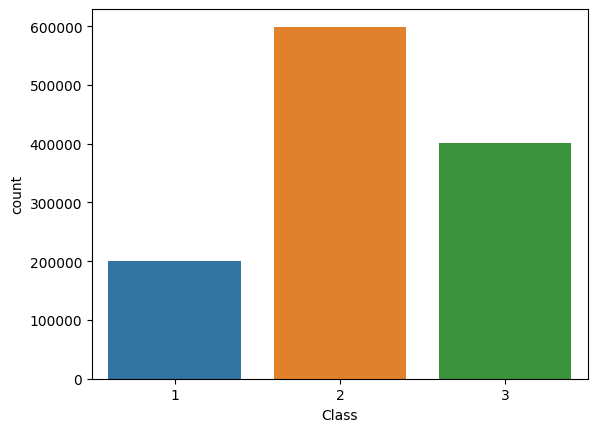

In [ ]:
sns.countplot(x='Class',data=df)
plt.show()

I can see that class 2 has the majority number of entries, taking up perhaps 50% of the data with classes 1 and 3 not far behind.

Next, I show the boxplots of each feature to see which, if any, contain outlier values.



[Text(0, 0, 'A'),
 Text(1, 0, 'B'),
 Text(2, 0, 'C'),
 Text(3, 0, 'D'),
 Text(4, 0, 'E'),
 Text(5, 0, 'F'),
 Text(6, 0, 'G'),
 Text(7, 0, 'H'),
 Text(8, 0, 'I'),
 Text(9, 0, 'J'),
 Text(10, 0, 'K'),
 Text(11, 0, 'L'),
 Text(12, 0, 'M'),
 Text(13, 0, 'N'),
 Text(14, 0, 'O'),
 Text(15, 0, 'Class')]

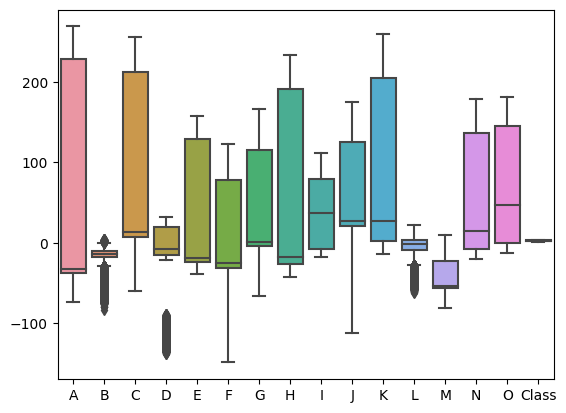

In [ ]:
ax = sns.boxplot(data=df)
ax.set_xticklabels(labels=df.columns)

It appears as if only features B, D, and L have any outliers. I was curious to see if the entries containing outliers belonged to any particular class majority--meaning that they could be treated as a special case for classification. I created a new dataframe that contained only the outliers and plotted the class distributions.

In [ ]:
# Calculate the Z-score for each value
z_scores = abs((df - df.mean())) / df.std()

#create new dataframe with only outliers
df_outliers = df[(z_scores > 3).any(axis=1)]
df_outliers.head()

,A,B,C,D,E,F,G,H,I,J,K,L,M,N,O,Class
110,-60.056274,-64.436592,-39.132428,-115.334263,-9.806615,-133.878211,-48.521985,-9.112590,56.965816,-85.293921,55.294256,-35.569934,-53.396883,44.658164,58.696852,2
127,-63.562609,-66.749338,-36.036216,-101.201745,-10.137603,-124.691446,-47.433508,-0.234929,57.484108,-91.540800,42.930640,-43.566345,-51.784804,36.512827,54.315864,3
238,-63.838351,-64.676869,-46.694268,-111.026577,-13.351495,-128.367252,-48.652152,-7.135434,60.851760,-93.629115,48.036804,-32.555005,-50.045871,41.521540,59.403902,2
531,-64.506234,-64.505923,-35.972283,-107.337808,-20.111229,-122.993112,-52.073749,-6.405993,53.541641,-83.769010,43.574428,-46.134175,-64.419007,19.915239,54.758334,2
728,-60.169245,-49.675131,-41.075187,-117.099062,-15.831324,-128.787897,-51.427287,-0.530741,48.474618,-92.325511,41.282224,-54.446072,-55.588395,38.355356,62.113315,2


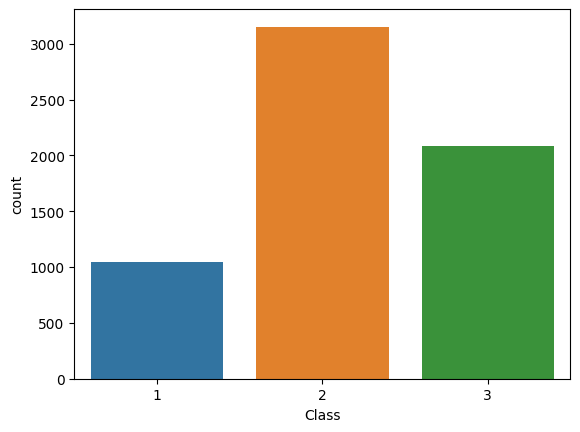

In [ ]:
sns.countplot(x='Class',data=df_outliers)
plt.show()

This distribution looks exactly the same as the dataset with all values included.

Next, I was curious to see if any particular feature's outliers had a resounding class majority to see if considering just those could help with classification at all.

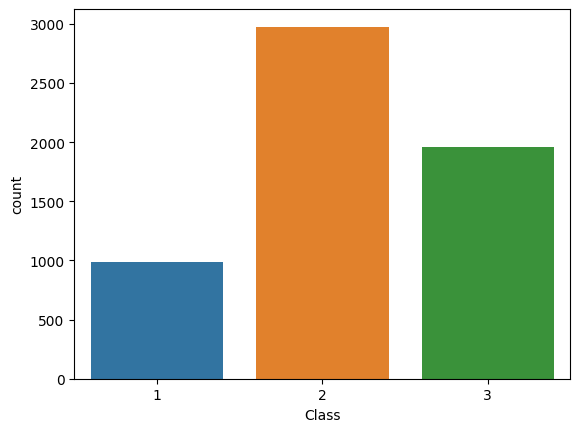

In [ ]:
dfB = df.loc[:,['B','Class']]

z_scoresB = abs((dfB - dfB.mean())) / dfB.std()

df_outliersB = dfB[(z_scoresB > 3).any(axis=1)]

sns.countplot(x='Class',data=df_outliersB)
plt.show()

This is an example of the process that I used to analyze feature B's outliers, and it's clear that this distribution is also the same as the original dataset. I ran similar code for features D and L but found the same results.

Based on this analysis, it did not seem advantageoud to consider outliers as a fringe case for classification. Therefore, I removed them from the data so they didn't affect summary statistics used later.

In [ ]:
df = df[(z_scores < 3).all(axis=1)]
print(df.shape)

(1193716, 16)


The next step I wanted to take in my data analysis was to see the summary statistics for each feature and the mean values for each feature grouped by class.

In [ ]:
df.describe()

,A,B,C,D,E,F,G,H,I,J,K,L,M,N,O,Class
count,1.193716e+06,1.193716e+06,1.193716e+06,1.193716e+06,1.193716e+06,1.193716e+06,1.193716e+06,1.193716e+06,1.193716e+06,1.193716e+06,1.193716e+06,1.193716e+06,1.193716e+06,1.193716e+06,1.193716e+06,1.193716e+06
mean,5.127006e+01,-1.859638e+01,7.221468e+01,-1.302937e+01,2.967397e+01,-5.556763e+00,3.218744e+01,5.143688e+01,3.289812e+01,4.163375e+01,7.955735e+01,-6.572324e+00,-4.226676e+01,4.956960e+01,5.980252e+01,2.167336e+00
std,1.293377e+02,1.412193e+01,1.052384e+02,4.646286e+01,7.294319e+01,7.276581e+01,6.649355e+01,1.035869e+02,4.225687e+01,7.652201e+01,9.505787e+01,1.542274e+01,1.793629e+01,6.744867e+01,6.695195e+01,6.874984e-01
min,-7.308940e+01,-6.222383e+01,-5.972853e+01,-1.375818e+02,-3.829826e+01,-1.485917e+02,-6.654137e+01,-4.246089e+01,-1.818542e+01,-1.123844e+02,-1.415233e+01,-5.346733e+01,-8.144988e+01,-2.057979e+01,-1.283059e+01,1.000000e+00
25%,-3.780827e+01,-1.775918e+01,7.685009e+00,-1.465145e+01,-2.438129e+01,-3.059424e+01,-3.374245e+00,-2.631824e+01,-7.609854e+00,2.121195e+01,2.397390e+00,-8.684320e+00,-5.566943e+01,-7.151169e+00,1.440800e-01,2.000000e+00
50%,-3.191680e+01,-1.366546e+01,1.354735e+01,1.208039e+01,-1.906021e+01,-2.469506e+01,1.541504e+00,-1.869131e+01,-1.980466e+00,2.723772e+01,1.103891e+01,-1.025141e+00,-5.297566e+01,4.363521e-01,7.384988e+00,2.000000e+00
75%,2.280929e+02,-1.053829e+01,2.124468e+02,1.957742e+01,1.289626e+02,7.845013e+01,1.153048e+02,1.916882e+02,7.992832e+01,1.254983e+02,2.047679e+02,3.357204e+00,-2.200822e+01,1.364647e+02,1.452034e+02,3.000000e+00
max,2.687738e+02,4.460108e+00,2.561698e+02,3.263799e+01,1.579843e+02,1.229186e+02,1.660534e+02,2.329496e+02,1.112970e+02,1.755397e+02,2.598003e+02,2.159496e+01,1.032828e+01,1.789303e+02,1.807011e+02,3.000000e+00


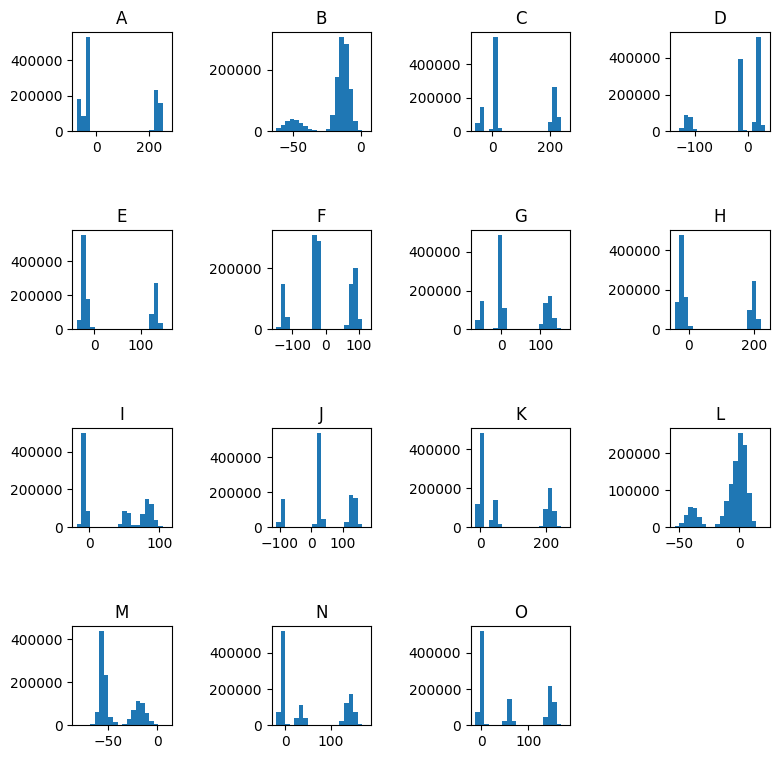

In [ ]:
features = 'ABCDEFGHIJKLMNO'

fig1 = plt.figure()
for i in range(1,16):
  fig1.add_subplot(4,4,i)
  plt.hist(df[features[i-1:i]], bins=20)
  plt.title(features[i-1:i])

fig1.subplots_adjust(hspace=1, wspace=1)
fig1.set_figheight(9)
fig1.set_figwidth(9)
#code taken and adapted from final project example written by Victoria Belotti

In [ ]:
df.groupby('Class').mean()

,A,B,C,D,E,F,G,H,I,J,K,L,M,N,O
Class,,,,,,,,,,,,,,,
1,51.345293,-18.634572,72.261264,-13.140152,29.738889,-5.589024,32.167550,51.536968,32.986081,41.573650,79.682057,-6.609637,-42.252418,49.661132,59.897088
2,51.333542,-18.572485,72.286499,-12.963137,29.697394,-5.476865,32.246143,51.467648,32.883367,41.713203,79.566430,-6.549126,-42.260753,49.575803,59.803906
3,51.137603,-18.613058,72.084071,-13.073128,29.606546,-5.660118,32.109596,51.340951,32.876295,41.544943,79.481535,-6.588388,-42.282883,49.514654,59.753260


The box plots from earlier showed that the data would be wide spread, but the summary statistics and histogram visualizations confirm that none of the features we are given are normally distributed. This information will become important later when deciding which model to use for classification.

When looking at the feature means by class, there's no clear difference over any feature that could be useful for classification, especially when considering the standard deviations for each feature as well. This means that basically all of the data is bunched up on top of each other.

<Axes: >

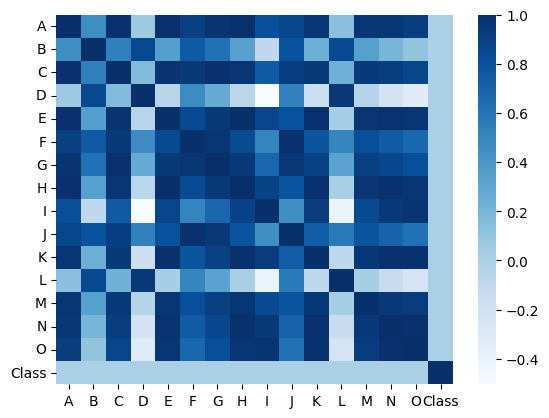

In [ ]:
sns.heatmap(df.corr(),cmap='Blues')

Next I wanted to see the correlation between different features. The heat map above shows a lot of dark blue values that indicate a high amount of covariance between variables. Because of this, I chose not to attempt to use a Naive Bayes classifier. A Naive Bayes model assumes independence between features, and I felt that the correlation between features was too high to utlize that assumption[2].

# Model Training

The model training process includes all aspects of feature engineering, model selection, and model training. I wanted to create a pairplot of all or most features of the raw data, but that would take way too much runtime to accomplish. Therefore, I decided to perform PCA first and decide how many components I wanted to keep before plotting them together.

I began by separating the data with an 80/20 split for training and testing respectively.

In [ ]:
X = df.drop(labels=['Class'],axis=1)
y = df['Class']

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2)

In [ ]:
pca = PCA()
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

pca.explained_variance_ratio_

array([9.05437372e-01, 9.02413508e-02, 5.15442698e-04, 4.84086171e-04,
       4.71337093e-04, 4.29854062e-04, 3.94697475e-04, 3.50671959e-04,
       3.25763118e-04, 2.59769701e-04, 2.58278840e-04, 2.34571496e-04,
       2.21034757e-04, 1.90872965e-04, 1.84896850e-04])

Just the first two principal components can be used to explain 99.57% of the variance of the dataset, and so I decided to use only those.

In [ ]:
pca2 = PCA(n_components = 2)
X_train_pca = pca2.fit_transform(X_train)
X_test_pca = pca2.transform(X_test)

pca2.explained_variance_ratio_

array([0.90543737, 0.09024135])

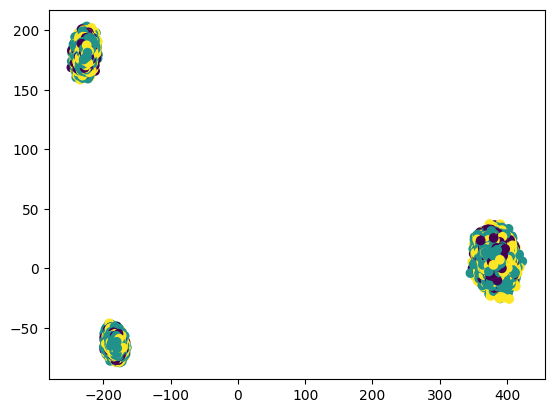

In [ ]:
plt.scatter(X_train_pca[:,0], X_train_pca[:,1], c=y_train);

The scatter plot of these features shows exactly what I thought previously where all of the classes are clustered together on top of each other in blobs across the feature space. There does not appear to be any visual boundary line between classes.

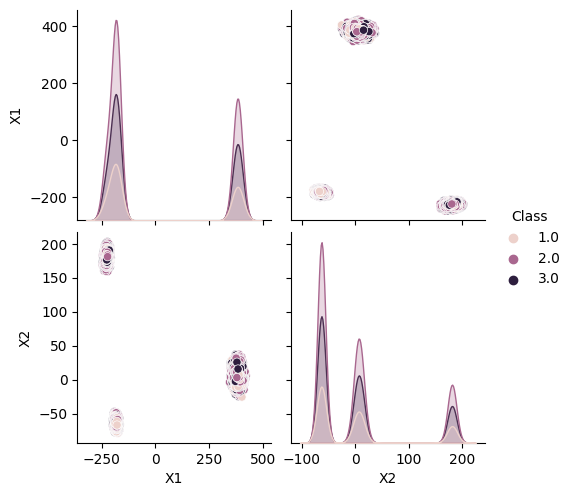

In [ ]:
df_pcax = pd.DataFrame(X_train_pca, columns = ['X1','X2'])
df_y = pd.DataFrame(y_train)

df_pca = pd.concat([df_pcax,df_y],axis=1)

sns.pairplot(df_pca, hue='Class');

When deciding what model I wanted to use, I first thought of using a decision tree because they do not require features to be normally distributed[3]. This is a huge advantage because, as discussed previously, none of our features were normally distributed and the PCA Decomposition also did not produce normally distributed features.

To make the decision tree classifier more robust, I chose a random forest model that combines several decision trees to make a better class estimation and correct for overfitting that is common with decision trees. I set the maximum depth to 3 so that the trees would not run to maximum purity and take too much runtime.

In [ ]:
rf = RandomForestClassifier(max_depth=3,random_state=0)
rf = rf.fit(X_train_pca,y_train)

I didn't know if a random forest would work very well for the dataset, because as discussed previously it seemed as if the data was stacked all on top of each other with no real boundaries that are utilized in a decision tree model. So I then went off the assumption that while all the classes might be mixed together inseparably, perhaps there could be small clusters of each class that are near each other within the data blobs. I then decided to train a K-nearest neighbors classifier with the k value set to a low threshold of 3 to see if that was able to improve the performance results at all. I also tested the KNN classifier with 4 n_neighbors to see how that affected the performance compared to 3.

In [ ]:
knn = KNeighborsClassifier(n_neighbors=3)
knn = knn.fit(X_train_pca, y_train)

In [ ]:
knn4 = KNeighborsClassifier(n_neighbors=4)
knn4 = knn4.fit(X_train_pca, y_train)

# Model Validation

In [ ]:
#Random Forest Report
expected = y_test
predicted_rf = rf.predict(X_test_pca)

print(metrics.classification_report(expected,predicted_rf))

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           1       0.00      0.00      0.00     39625
           2       0.50      1.00      0.67    119016
           3       0.00      0.00      0.00     80103

    accuracy                           0.50    238744
   macro avg       0.17      0.33      0.22    238744
weighted avg       0.25      0.50      0.33    238744



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Using the random forest model, it appears that the classifier predicted no points in class 1 or 3. This leads to the perfect recall score, because all class 2 samples were correctly predicted to be class 2 because all samples were predicted to be class 2. The precision value gives another view of this, because 100% of the data was predicted to be class 2 and only 50% of the data actually belongs to class 2, the precision score is .50.

Obviously none of the other classes were able to be predicted at all, so the micro, macro, and weighted averages suffer and reflect the poor fit of this model for the dataset.

In [ ]:
#KNN K=3 Report
expected = y_test
predicted_knn = knn.predict(X_test_pca)

print(metrics.classification_report(expected, predicted_knn))

              precision    recall  f1-score   support

           1       0.17      0.24      0.20     39625
           2       0.50      0.50      0.50    119016
           3       0.33      0.26      0.29     80103

    accuracy                           0.37    238744
   macro avg       0.33      0.33      0.33    238744
weighted avg       0.39      0.37      0.38    238744



In [ ]:
#KNN K=4 Report
expected = y_test
predicted_knn4 = knn4.predict(X_test_pca)

print(metrics.classification_report(expected, predicted_knn4))

              precision    recall  f1-score   support

           1       0.17      0.13      0.15     39625
           2       0.50      0.64      0.56    119016
           3       0.34      0.22      0.27     80103

    accuracy                           0.42    238744
   macro avg       0.33      0.33      0.33    238744
weighted avg       0.39      0.42      0.39    238744



These two cells show the comparison of using a K-nearest neighbors model with k equal and 3 and 4 respectively. Both of them made improvements when compared to the random forest model, with k=4 being the best option. I also tested k=5 and found very similar results to k=4, so I didn't test any higher.

In the KNN model, the overall accuracy score was decreased, but all macro average and most weighted average scores increased. This is due to there being some kind of recognition now from the classifier of samples in class 1 and 3. While their precision, recall, and f1 scores are not great by any means, it is an improvement from the random forest model to be able to classify any other class besides class 2 at all. Therefore for my final pipeline I chose to use the K-nearest neighbors classifier with k=4.

# ONNX Pipeline

I ran into an error trying to convert to an ONNX file. I left my code in here to show my process and also the error that I received, but I ended up having to convert to a PMML file instead.

In [ ]:
pipeline = Pipeline([
    ('pca',
     PCA(n_components=2)),
    ('knn',
     KNeighborsClassifier(n_neighbors=4))
])

pipeline.fit(X_train,y_train)

Pipeline(steps=[('pca', PCA(n_components=2)),
                ('knn', KNeighborsClassifier(n_neighbors=4))])

In [ ]:
expected = y_test
predicted_pipe = pipeline.predict(X_test)

print(metrics.classification_report(expected, predicted_pipe))

              precision    recall  f1-score   support

           1       0.17      0.14      0.15     39710
           2       0.50      0.65      0.56    118987
           3       0.33      0.22      0.27     80047

    accuracy                           0.42    238744
   macro avg       0.33      0.33      0.33    238744
weighted avg       0.39      0.42      0.40    238744



In [ ]:
input_types = dict([(x, FloatTensorType([None, 1])) for x in X_train.columns.values])

try:
    model_onnx = convert_sklearn(pipeline,
                                 'pipeline_CassieCarlson_cs422final',
                                initial_types=list(input_types.items()))
except Exception as e:
    print(e)

with open("pipeline_CassieCarlson_cs422final.onnx", "wb") as f:
    f.write(model_onnx.SerializeToString())

For operator SklearnPCA (type: SklearnPCA), at most 1 input(s) is(are) supported but we got 15 input(s) which are ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O']


NameError: ignored

# PMML Pipeline

In [ ]:
pipeline_pmml = PMMLPipeline([
    ('pca',
     PCA(n_components=2)),
    ('knn',
     KNeighborsClassifier(n_neighbors=4))
])

pipeline_pmml.fit(X_train,y_train)

PMMLPipeline(steps=[('pca', PCA(n_components=2)),
       ('knn', KNeighborsClassifier(n_neighbors=4))])

In [ ]:
expected = y_test
predicted_pipe_pmml = pipeline_pmml.predict(X_test)

print(metrics.classification_report(expected, predicted_pipe_pmml))

              precision    recall  f1-score   support

           1       0.17      0.14      0.15     39710
           2       0.50      0.65      0.56    118987
           3       0.33      0.22      0.27     80047

    accuracy                           0.42    238744
   macro avg       0.33      0.33      0.33    238744
weighted avg       0.39      0.42      0.40    238744



In [ ]:
sklearn2pmml(pipeline_pmml,
             '/content/drive/MyDrive/Classes/CS422/Project/project_pipeline.pmml',
             with_repr=True)

# Conclusion

One positive outcome of this project is that I was able to use insights obtained from EDA to brainstorm a KNN model that did end up performing better than my first idea to use a random forest model. I was also pleased to be able to identify the difficult classes of 1 and 3 at all, even if their validation scores are very low across the board. Some limitations of my model is that I wanted to focus on classification methods learned in class because I felt as if I had a good understanding of them and wanted to utilize that knowledge. That being said, there may then be several other model selections that would produce even better classification results in the end.

# References

1. Data Cleaning 101: https://medium.com/analytics-vidhya/data-cleaning-101-a5dccd695dfe

2. Decision Tree vs. Naive Bayes: https://www.baeldung.com/cs/decision-tree-vs-naive-bayes

3. The Evolution of Trees-Based Classification Models: https://towardsdatascience.com/the-evolution-of-trees-based-classification-models-cb40912c8b35#:~:text=Decision%20Trees%20are%20a%20non,and%20normalization%20prior%20to%20implementation
